<a href="https://colab.research.google.com/github/Ravi-Poddar26/Feature-Engineering/blob/master/Feature_scaling1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature scaling is a technique to standardize the independent features present in the data in a fixed range.

Types of Feature scaling:

  1.standardization
  
  2.Normalization

# 1.standardization
if x is a feature of data

then, x_std = (x-mean(x))/stde(x)

for x_std , mean = 0, and standard_deviation = 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
import os
import zipfile
with zipfile.ZipFile("archive.zip","r") as data:
  data.extractall()

In [ ]:
data

<zipfile.ZipFile [closed]>

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Social_Network_Ads.csv")

In [3]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data = data.iloc[:,2:]

In [6]:
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


# Train test split

In [7]:
import sklearn
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:2],data.iloc[:,-1],test_size = 0.3, random_state = 0)

In [9]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

# Standard Scaler

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train) # it take the mean and standard deviation from the X_train data.

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
scaler.mean_, scaler.scale_, scaler.n_features_in_, scaler.n_samples_seen_

(array([3.78642857e+01, 6.98071429e+04]),
 array([1.01999375e+01, 3.45792870e+04]),
 2,
 np.int64(280))

In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [13]:
X_test_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [14]:
np.round(X_train.describe(),4)

,Age,EstimatedSalary
count,280.0000,280.0000
mean,37.8643,69807.1429
std,10.2182,34641.2017
min,18.0000,15000.0000
25%,30.0000,43000.0000
50%,37.0000,70500.0000
75%,46.0000,88000.0000
max,60.0000,150000.0000


In [15]:
np.round(X_train_scaled.describe(),4)

,Age,EstimatedSalary
count,280.0000,280.0000
mean,0.0000,0.0000
std,1.0018,1.0018
min,-1.9475,-1.5850
25%,-0.7710,-0.7752
50%,-0.0847,0.0200
75%,0.7976,0.5261
max,2.1702,2.3191


# Effect of scaling

Text(0.5, 1.0, 'After Scaling')

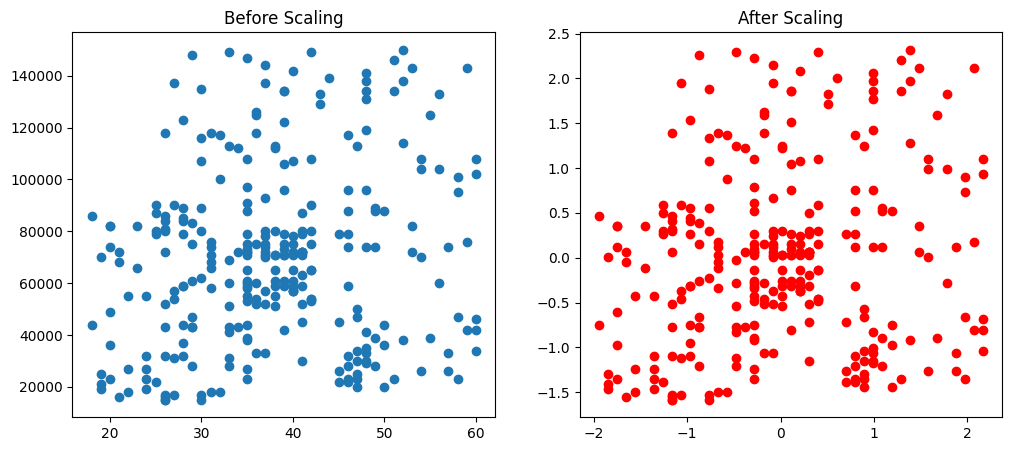

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color = 'red')
ax2.set_title('After Scaling')

<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

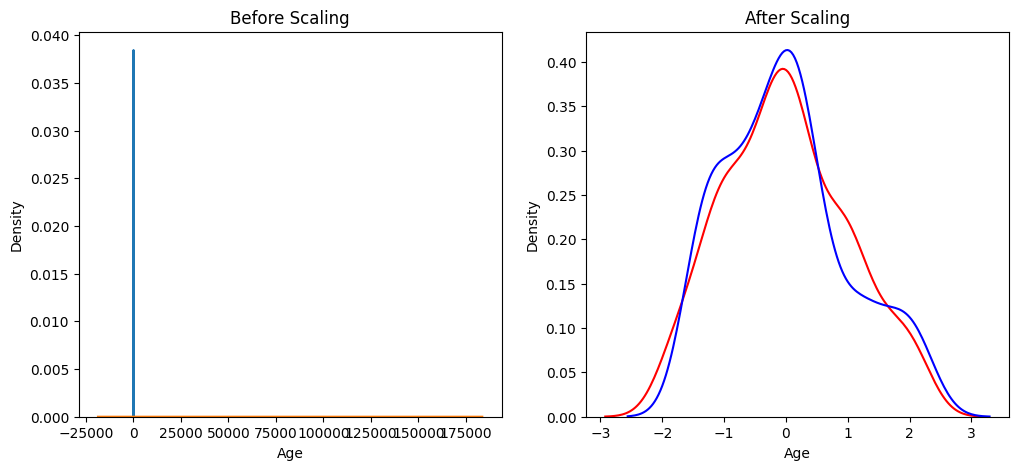

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'],ax = ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)

#After scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2, color = 'red')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2, color = 'blue')

<Axes: title={'center': 'After Scaling age distribution'}, xlabel='Age', ylabel='Density'>

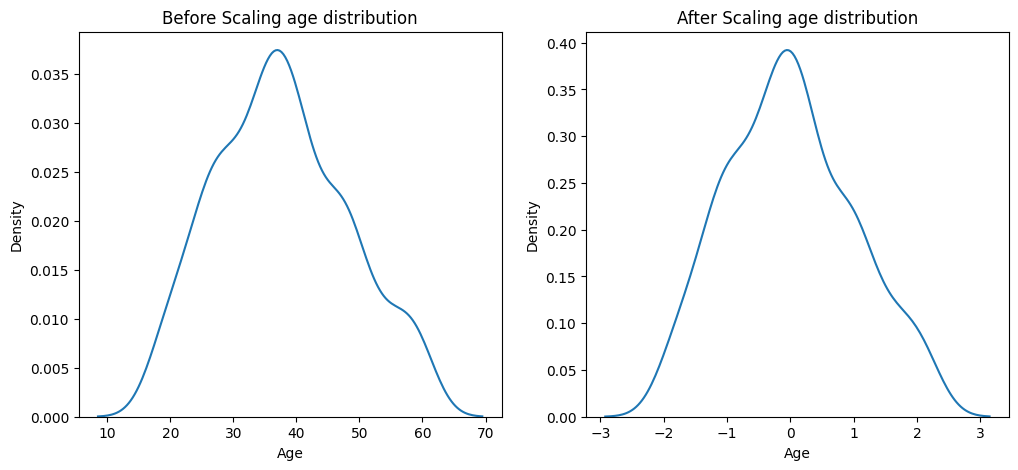

In [18]:
fig, (fig1, fig2) = plt.subplots(ncols=2, figsize=(12,5))
fig1.set_title('Before Scaling age distribution')
sns.kdeplot(data['Age'], ax = fig1)
fig2.set_title('After Scaling age distribution')
sns.kdeplot(X_train_scaled['Age'], ax = fig2)

<Axes: title={'center': 'After Scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

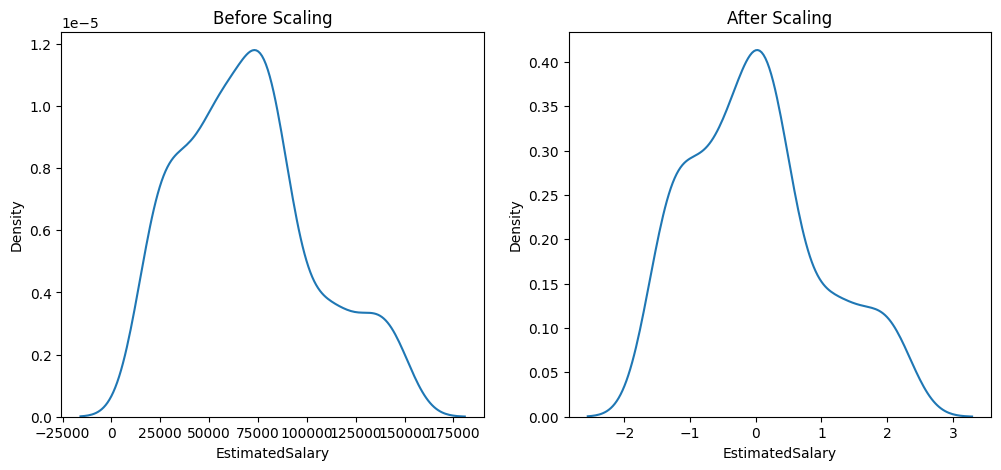

In [19]:
fig, (fig1, fig2) = plt.subplots(ncols=2, figsize=(12,5))
fig1.set_title('Before Scaling')
sns.kdeplot(data['EstimatedSalary'], ax = fig1)
fig2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax = fig2)

# why scaling is important

In [20]:
from sklearn.linear_model import LogisticRegression


In [21]:
#logistic regression for normal data
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred = lr.predict(X_test)

In [23]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [24]:
np.array(y_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1])

In [25]:
#logistic regression for scaled data
lr_scaled = LogisticRegression()
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [26]:
y_pred_scaled = lr_scaled.predict(X_test_scaled)


In [27]:
y_pred_scaled

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

# Accuracy score for both

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
print("Actual", accuracy_score(y_test, y_pred)*100)
print("Scaled", accuracy_score(y_test, y_pred_scaled)*100)

Actual 87.5
Scaled 86.66666666666667


## standardization show impact the accuracy score but in some model standardization is not show any impact

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [38]:
y_pred_dt

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1])

In [40]:
np.array(y_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1])

In [43]:
dt_scaled = DecisionTreeClassifier()
dt_scaled.fit(X_train_scaled, y_train)
y_pred_dt_scaled = dt_scaled.predict(X_test_scaled)

In [44]:
y_pred_dt_scaled

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1])

In [45]:
from sklearn.metrics import accuracy_score

In [54]:
print("Actual", accuracy_score(y_test, y_pred_dt))
print("Scaled", accuracy_score(y_test, y_pred_dt_scaled)) # not do some change

Actual 0.875
Scaled 0.8666666666666667
